<a href="https://colab.research.google.com/github/samhithabodangi/Organ-Rejection-Model/blob/main/Model%20Versions/organRejectionv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

## Data Formatted as Pandas Dataframe

In [ ]:
df = pd.read_csv('processed_sequences.csv')
df

,Unnamed: 0,ID,HLA,Sequence,Length
0,0,HLA:HLA00001,A*01:01,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
1,269,HLA:HLA00002,A*01:02,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFSTSVSRPGSGEPRF...,365
2,273,HLA:HLA00003,A*01:03,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
3,279,HLA:HLA01031,A*01:06,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,365
4,280,HLA:HLA01208,A*01:07,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEP...,181
...,...,...,...,...,...
21389,42067,HLA:HLA39147,DPB1*1574:01,NYLFQGRQECYAFNGTQRFLERYIYNREEFVRFDSDVGEFRAVTER...,224
21390,42068,HLA:HLA39087,DPB1*1575:01,NYVYQLRQECYPFNGTQRFLERYIYNREEYARFDSDVGEFRAVTEL...,224
21391,42069,HLA:HLA39088,DPB1*1576:01,NYVYQLRQECYAFNGTQRFLERYIYNWQEYARFDSDVGEFRAVTEL...,224
21392,42070,HLA:HLA39106,DPB1*1577:01,NYVHQLRQECYAFNGTQRFLERYIYNREEFVRFDRDVGEFRAVTEL...,224


In [ ]:
excel_file = "HLA-EMMA-Template.xlsx"
typing = pd.read_excel(excel_file, index_col=0)

selected_rows1 = typing.loc[["R1", "D1"]]
selected_rows3 = typing.loc[["R3", "D3"]]

In [ ]:
typing

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DRB3/4/5_1,DRB3/4/5_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
Code,,,,,,,,,,,,,,,,,,
R1,A*01:01,A*32:01,B*08:01,B*40:02,C*02:02,C*07:01,DRB1*11:01,DRB1*13:01,DRB3*02:01,NaN,DQB1*03:01,DQB1*06:03,DQA1*01:03,DQA1*05:05,DPB1*04:01,DPB1*105:01,DPA1*01:03,NaN
D1,A*02:01,NaN,B*07:02,B*35:03,C*04:01,C*07:02,DRB1*04:01,DRB1*11:04,DRB4*01:03N,NaN,DQB1*03:01,DQB1*03:02,DQA1*03:01,DQA1*05:05,DPB1*05:01,DPB1*05:01,DPA1*01:03,NaN
R2,A1,A2,B7,B37,Cw6,Cw7,DR8,DR15,DR51,NaN,DQ4,DQ6,NaN,NaN,NaN,NaN,NaN,NaN
D2,A1,A68,B61,B51,Cw2,NaN,DR7,DR13,DR52,DR53,DQ9,DQ6,NaN,NaN,NaN,NaN,NaN,NaN
R3,A*01:01,A*02:01,B*07:02,B*37:01,C*06:02,C*07:02,DRB1*08:01,DRB1*15:01,DRB5*01:01,NaN,DQB1*04:02,DQB1*06:02,DQA1*01:02,DQA1*04:01,DPB1*02:01,DPB1*04:01,DPA1*01:03,NaN
D3,A*01:01,A*68:01,B*40:02,B*51:01,C*02:02,NaN,DRB1*07:01,DRB1*13:01,DRB3*02:02,DRB4*01:03N,DQB1*03:03,DQB1*06:03,DQA1*01:03,DQA1*02:01,NaN,NaN,NaN,NaN


In [ ]:
selected_rows1

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DRB3/4/5_1,DRB3/4/5_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
Code,,,,,,,,,,,,,,,,,,
R1,A*01:01,A*32:01,B*08:01,B*40:02,C*02:02,C*07:01,DRB1*11:01,DRB1*13:01,DRB3*02:01,NaN,DQB1*03:01,DQB1*06:03,DQA1*01:03,DQA1*05:05,DPB1*04:01,DPB1*105:01,DPA1*01:03,NaN
D1,A*02:01,NaN,B*07:02,B*35:03,C*04:01,C*07:02,DRB1*04:01,DRB1*11:04,DRB4*01:03N,NaN,DQB1*03:01,DQB1*03:02,DQA1*03:01,DQA1*05:05,DPB1*05:01,DPB1*05:01,DPA1*01:03,NaN


In [ ]:
selected_rows3

,A_1,A_2,B_1,B_2,C_1,C_2,DRB1_1,DRB1_2,DRB3/4/5_1,DRB3/4/5_2,DQB1_1,DQB1_2,DQA1_1,DQA1_2,DPB1_1,DPB1_2,DPA1_1,DPA1_2
Code,,,,,,,,,,,,,,,,,,
R3,A*01:01,A*02:01,B*07:02,B*37:01,C*06:02,C*07:02,DRB1*08:01,DRB1*15:01,DRB5*01:01,NaN,DQB1*04:02,DQB1*06:02,DQA1*01:02,DQA1*04:01,DPB1*02:01,DPB1*04:01,DPA1*01:03,NaN
D3,A*01:01,A*68:01,B*40:02,B*51:01,C*02:02,NaN,DRB1*07:01,DRB1*13:01,DRB3*02:02,DRB4*01:03N,DQB1*03:03,DQB1*06:03,DQA1*01:03,DQA1*02:01,NaN,NaN,NaN,NaN


## Find Sequences from Dataset

In [ ]:
def find_sequence(allele):
  HLA_allele = allele
  filtered_df = df[df['HLA'] == HLA_allele]

  filtered_rows = df[df['HLA'] == HLA_allele]
  filtered_df["Sequence"]

  return filtered_df

In [ ]:
def get_sequence(allele):
  if pd.notna(allele):
    s = find_sequence(allele)
    f = pd.Series(s.iloc[0])
  else:
    return None

  return f.loc['Sequence']

## Donor and Recipient Alleles

In [ ]:
donor_id = "D1"
recipient_id = "R1"

In [ ]:
R_A1 = typing.loc[recipient_id, 'A_1']
R_A2 = typing.loc[recipient_id, 'A_2']

R_B1 = typing.loc[recipient_id, 'B_1']
R_B2 = typing.loc[recipient_id, 'B_2']

R_C1 = typing.loc[recipient_id, 'C_1']
R_C2 = typing.loc[recipient_id, 'C_2']

R_DRB1_1 = typing.loc[recipient_id, 'DRB1_1']
R_DRB1_2 = typing.loc[recipient_id, 'DRB1_2']

R_DRB345_1 = typing.loc[recipient_id, 'DRB3/4/5_1']
R_DRB345_2 = typing.loc[recipient_id, 'DRB3/4/5_2']

R_DQB1_1 = typing.loc[recipient_id, 'DQB1_1']
R_DQB1_2 = typing.loc[recipient_id, 'DQB1_2']

R_DQA1_1 = typing.loc[recipient_id, 'DQA1_1']
R_DQA1_2 = typing.loc[recipient_id, 'DQA1_1']

R_DPB1_1 = typing.loc[recipient_id, 'DPB1_1']
R_DPB1_2 = typing.loc[recipient_id, 'DPB1_2']

R_DPA1_1 = typing.loc[recipient_id, 'DPA1_1']
R_DPA1_2 = typing.loc[recipient_id, 'DPA1_2']

In [ ]:
D_A1 = typing.loc[donor_id, 'A_1']
D_A2 = typing.loc[donor_id, 'A_2']

D_B1 = typing.loc[donor_id, 'B_1']
D_B2 = typing.loc[donor_id, 'B_2']

D_C1 = typing.loc[donor_id, 'C_1']
D_C2 = typing.loc[donor_id, 'C_2']

D_DRB1_1 = typing.loc[donor_id, 'DRB1_1']
D_DRB1_2 = typing.loc[donor_id, 'DRB1_2']

D_DRB345_1 = typing.loc[donor_id, 'DRB3/4/5_1']
D_DRB345_2 = typing.loc[donor_id, 'DRB3/4/5_2']

D_DQB1_1 = typing.loc[donor_id, 'DQB1_1']
D_DQB1_2 = typing.loc[donor_id, 'DQB1_2']

D_DQA1_1 = typing.loc[donor_id, 'DQB1_1']
D_DQA1_2 = typing.loc[donor_id, 'DQB1_1']

D_DPB1_1 = typing.loc[donor_id, 'DPB1_1']
D_DPB1_2 = typing.loc[donor_id, 'DPB1_2']

D_DPA1_1 = typing.loc[donor_id, 'DPA1_1']
D_DPA1_2 = typing.loc[donor_id, 'DPA1_2']

In [ ]:
recipientA1_sequence = get_sequence(R_A1)
recipientA2_sequence = get_sequence(R_A2)
donorA1_sequence = get_sequence(D_A1)
donorA2_sequence = get_sequence(D_A2)

### Sequences

In [ ]:
recipientA1_sequence

'MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV'

In [ ]:
recipientA2_sequence

'MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDQETRNVKAHSQTDRESLRIALRYYNQSEAGSHTIQMMYGCDVGPDGRLLRGYQQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWASVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAMFAGAVVAAVRWRRKSSDRKGGSYSQAASSDSAQGSDMSLTACKV'

In [ ]:
donorA1_sequence

'MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV'

In [ ]:
donorA2_sequence

## Aligning Sequences

In [ ]:
import numpy as np


def needleman_wunsch(donor, recipient):
    """
    Performs Needleman-Wunsch alignment without gaps.

    Returns:
        A tuple containing the aligned donor and recipient sequences.
    """

    score_matrix = np.zeros((len(donor) + 1, len(recipient) + 1))

    for i in range(1, len(donor) + 1):
        for j in range(1, len(recipient) + 1):
            if donor[i - 1] == recipient[j - 1]:
                match_score = 1
            else:
                match_score = -1
            score_matrix[i, j] = max(
                score_matrix[i - 1, j] - 1,
                score_matrix[i, j - 1] - 1,
                score_matrix[i - 1, j - 1] + match_score,
            )

    aligned_donor = ""
    aligned_recipient = ""
    i = len(donor)
    j = len(recipient)
    while i > 0 or j > 0:
        if i > 0 and j > 0 and score_matrix[i, j] == score_matrix[i - 1, j - 1] + (
            1 if donor[i - 1] == recipient[j - 1] else -1
        ):
            aligned_donor = donor[i - 1] + aligned_donor
            aligned_recipient = recipient[j - 1] + aligned_recipient
            i -= 1
            j -= 1
        elif i > 0 and (j == 0 or score_matrix[i, j] == score_matrix[i - 1, j] - 1):
            aligned_donor = donor[i - 1] + aligned_donor
            aligned_recipient = donor[i - 1] + aligned_recipient
            i -= 1
        else:
            aligned_donor = donor[i - 1] + aligned_donor
            aligned_recipient = recipient[j - 1] + aligned_recipient
            i -= 1
            j -= 1

    return aligned_donor, aligned_recipient

In [ ]:
aligned_donor, aligned_recipient = needleman_wunsch(donorA1_sequence, recipientA1_sequence)

print("Aligned donor:", aligned_donor)
print("Aligned recipient:", aligned_recipient)

Aligned donor: MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWEAAHVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV
Aligned recipient: MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQKMEPRAPWIEQEGPEYWDQETRNMKAHSQTDRANLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITKRKWEAVHAAEQRRVYLEGRCVDGLRRYLENGKETLQRTDPPKTHMTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWRRKSSDRKGGSYTQAASSDSAQGSDVSLTACKV


## Find Mismatches

In [ ]:
def find_unique_mismatches(donor_sequence, recipient1_sequence, recipient2_sequence):
    unique_mismatches = []

    for position, donor_aa in enumerate(donor_sequence, start=1):
        recipient1_aa = recipient1_sequence[position - 1]
        recipient2_aa = recipient2_sequence[position - 1]

        if donor_aa != recipient1_aa and donor_aa != recipient2_aa:
            unique_mismatches.append((position, donor_aa, recipient1_aa, recipient2_aa))

    return unique_mismatches

In [ ]:
unique_mismatches = find_unique_mismatches(donorA1_sequence, recipientA1_sequence, recipientA2_sequence)

if unique_mismatches:
    print("Unique Amino Acid Mismatches:")
    for position, donor_aa, recipient1_aa, recipient2_aa in unique_mismatches:
        print(f"Position {position}: Donor '{donor_aa}' vs. Recipient1 '{recipient1_aa}' and Recipient2 '{recipient2_aa}'")
else:
    print("No unique amino acid mismatches.")

Unique Amino Acid Mismatches:
Position 10: Donor 'V' vs. Recipient1 'L' and Recipient2 'L'
Position 86: Donor 'G' vs. Recipient1 'Q' and Recipient2 'Q'
Position 90: Donor 'K' vs. Recipient1 'N' and Recipient2 'N'
Position 98: Donor 'H' vs. Recipient1 'D' and Recipient2 'D'
Position 100: Donor 'V' vs. Recipient1 'A' and Recipient2 'E'
Position 101: Donor 'D' vs. Recipient1 'N' and Recipient2 'S'
Position 119: Donor 'V' vs. Recipient1 'I' and Recipient2 'I'
Position 121: Donor 'R' vs. Recipient1 'I' and Recipient2 'M'
Position 129: Donor 'S' vs. Recipient1 'P' and Recipient2 'P'
Position 131: Donor 'W' vs. Recipient1 'G' and Recipient2 'G'
Position 138: Donor 'H' vs. Recipient1 'R' and Recipient2 'Q'
Position 140: Donor 'Y' vs. Recipient1 'D' and Recipient2 'D'
Position 151: Donor 'K' vs. Recipient1 'N' and Recipient2 'N'
Position 166: Donor 'T' vs. Recipient1 'I' and Recipient2 'I'
Position 169: Donor 'H' vs. Recipient1 'R' and Recipient2 'R'


In [ ]:
import pandas as pd

unique_mismatches = find_unique_mismatches(donorA1_sequence, recipientA1_sequence, recipientA2_sequence)

if unique_mismatches:
    data = []
    for position, donor_aa, recipient1_aa, recipient2_aa in unique_mismatches:
        data.append({
            "Position": position,
            "Donor_AA": donor_aa,
            "Recipient1_AA": recipient1_aa,
            "Recipient2_AA": recipient2_aa
        })

    general = pd.DataFrame(data)
else:
    print("No unique amino acid mismatches.")

In [ ]:
general

,Position,Donor_AA,Recipient1_AA,Recipient2_AA
0,10,V,L,L
1,86,G,Q,Q
2,90,K,N,N
3,98,H,D,D
4,100,V,A,E
5,101,D,N,S
6,119,V,I,I
7,121,R,I,M
8,129,S,P,P
9,131,W,G,G


## NetSurfP

In [ ]:
!pip3 install -qU pybiolib

In [ ]:
import biolib
print(biolib.__version__)

1.1.1747


In [ ]:
import biolib
nsp3 = biolib.load('DTU/NetSurfP-3')

INFO:biolib:Loaded project DTU/NetSurfP-3:0.0.2


In [ ]:
fasta_format = f">query\n{donorA1_sequence}\n"

with open("query.fasta", "w") as file:
    file.write(fasta_format)

print("Sequence converted and written to query.fasta")

Sequence converted and written to query.fasta


In [ ]:
nsp3_results = nsp3.cli(args='-i query.fasta')

INFO:biolib:Cloud: Initializing
INFO:biolib:Cloud: Pulling images...
INFO:biolib:Cloud: Computing...


Running NetSurfP-3.0 on input file: query.fasta
Loading model...
Processing sequences in batches of 25... 
Generating predictions: 100% 1/1 [00:00<00:00,  3.34seq/s]
Generating output...


INFO:biolib:Cloud: Computation finished
INFO:biolib:Cloud: Result Ready
INFO:biolib:Waiting for job 9a4ee54e-35d0-4995-a645-d61d705db638 to finish...
INFO:biolib:Job 9a4ee54e-35d0-4995-a645-d61d705db638 has finished.


In [ ]:
nsp3_results.save_files("biolib_results/")

INFO:biolib:Saving 12 files to biolib_results/...


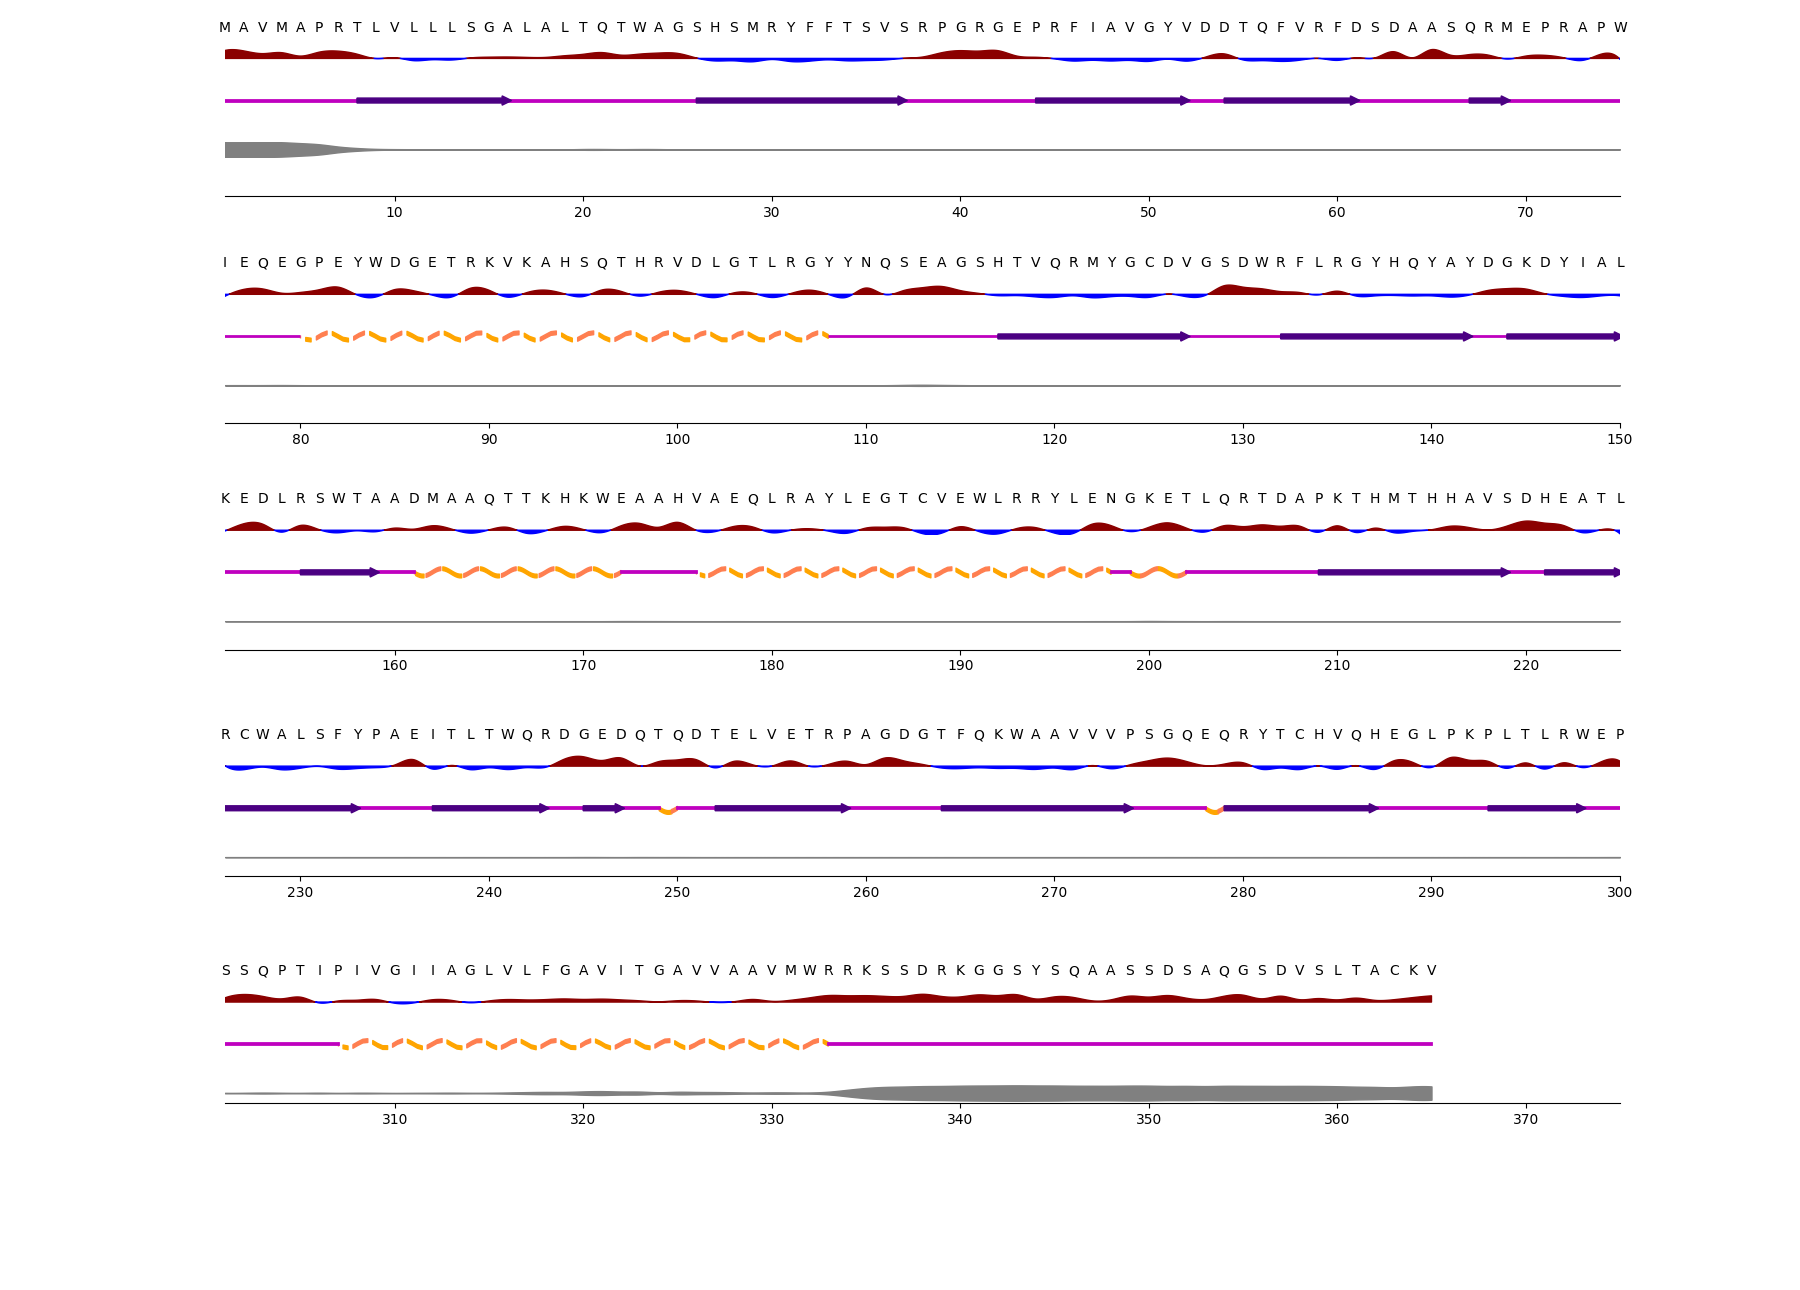

In [ ]:
from IPython.display import Image
Image(filename='/content/biolib_results/query.png')

In [ ]:
import pandas as pd
dfNet = pd.read_csv("/content/biolib_results/results.csv", index_col=0)
dfNet

,seq,n,rsa,asa,q3,p[q3_H],p[q3_E],p[q3_C],q8,p[q8_G],p[q8_H],p[q8_I],p[q8_B],p[q8_E],p[q8_S],p[q8_T],p[q8_C],phi,psi,disorder
id,,,,,,,,,,,,,,,,,,,,
>query,M,1,0.779966,174.712477,C,0.000062,0.001516,0.998422,C,0.000021,0.000015,0.000003,0.000167,0.000793,0.000637,0.000453,0.997911,-58.197414,148.727097,0.993361
>query,A,2,0.750342,96.794158,C,0.000384,0.015891,0.983725,C,0.000179,0.000076,0.000021,0.001230,0.008291,0.001861,0.001214,0.987128,-104.818787,143.901505,0.978407
>query,V,3,0.569944,99.170239,C,0.000582,0.048821,0.950597,C,0.000339,0.000166,0.000029,0.005748,0.024559,0.002564,0.001034,0.965561,-102.945236,132.072678,0.959709
>query,M,4,0.634051,142.027390,C,0.000398,0.052215,0.947387,C,0.000198,0.000094,0.000022,0.010307,0.021946,0.004325,0.000794,0.962314,-97.119217,139.918442,0.913765
>query,A,5,0.406504,52.439074,C,0.000558,0.048641,0.950801,C,0.000348,0.000180,0.000036,0.010455,0.023979,0.008900,0.001105,0.954996,-100.375443,142.870224,0.799584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
>query,T,361,0.512016,88.066670,C,0.019910,0.022679,0.957411,C,0.008726,0.009482,0.000175,0.007318,0.014414,0.023457,0.031283,0.905145,-94.108749,23.154285,0.815623
>query,A,362,0.364889,47.070719,C,0.019571,0.043104,0.937324,C,0.006845,0.009015,0.000237,0.018447,0.023079,0.029014,0.016764,0.896598,-89.640495,120.262177,0.779314
>query,C,363,0.406002,67.802341,C,0.011534,0.060718,0.927748,C,0.003724,0.004571,0.000164,0.025280,0.029696,0.014416,0.013135,0.909014,-86.011269,135.764648,0.741839


In [ ]:
print(dfNet.columns.tolist())

[' seq', ' n', ' rsa', ' asa', ' q3', ' p[q3_H]', ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]', ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi', ' psi', ' disorder']


In [ ]:
if 'rsa' in dfNet.columns:
    solvent_accessible_sequences = dfNet[dfNet['rsa'] > 0.25]
else:
    print("The 'rsa' column does not exist in the DataFrame.")

The 'rsa' column does not exist in the DataFrame.


In [ ]:
solvent_accessible_sequences = dfNet[dfNet[' rsa'] > 0.25]

In [ ]:
solvent_accessible_sequences.drop([' asa', ' q3', ' p[q3_H]', ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]', ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi', ' psi', ' disorder'], axis=1, inplace=True)


<ipython-input-154-47d134766600>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvent_accessible_sequences.drop([' asa', ' q3', ' p[q3_H]', ' p[q3_E]', ' p[q3_C]', ' q8', ' p[q8_G]', ' p[q8_H]', ' p[q8_I]', ' p[q8_B]', ' p[q8_E]', ' p[q8_S]', ' p[q8_T]', ' p[q8_C]', ' phi', ' psi', ' disorder'], axis=1, inplace=True)


In [ ]:
solvent_accessible_sequences

,seq,n,rsa
id,,,
>query,M,1,0.779966
>query,A,2,0.750342
>query,V,3,0.569944
>query,M,4,0.634051
>query,A,5,0.406504
...,...,...,...
>query,T,361,0.512016
>query,A,362,0.364889
>query,C,363,0.406002


In [ ]:
positions = solvent_accessible_sequences[' n'].tolist()

In [ ]:
filtered_mismatches = general[general['Position'].isin(positions)]

In [ ]:
filtered_mismatches.reset_index(drop=True, inplace=True)

In [ ]:
filtered_mismatches

,Position,Donor_AA,Recipient1_AA,Recipient2_AA
0,10,V,L,L
1,86,G,Q,Q
2,90,K,N,N
3,100,V,A,E
4,101,D,N,S
5,129,S,P,P
6,131,W,G,G
7,166,T,I,I
8,169,H,R,R


## Immune Epitope Database

In [ ]:
!pip install iedb

In [ ]:
import iedb

In [ ]:
iedb_attributes = dir(iedb)

print(iedb_attributes)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'api', 'query_bcell_epitope', 'query_mhci_binding', 'query_mhcii_binding', 'query_peptide_prediction', 'query_tcell_epitope']


In [ ]:
mhcii_res = iedb.query_peptide_prediction(method="nn_align", sequence=donorA1_sequence, allele="HLA-DRB1*01:01", length=15)

API returned error: invalid method: nn_align.
* Please go to the link below for usage info:
http://tools.iedb.org/main/html/tools_api.html



In [ ]:
mhcii_res

In [ ]:
!pip install requests

In [ ]:
import requests

api_url = "http://tools-cluster-interface.iedb.org/tools_api/mhcii/"

In [ ]:
data = {
    "method": "nn_align",
    "sequence_text": "SLYNTVATLYCVHQRIDV",
    "allele": "HLA-DRB1*11:01",
    "length": "15"
}

response = requests.post(api_url, data=data)

In [ ]:
print(response.text)

allele	seq_num	start	end	length	core_peptide	peptide	ic50	rank	adjusted_rank
HLA-DRB1*11:01	1	1	15	15	YNTVATLYC	SLYNTVATLYCVHQR	2132.90	49.0	49.00
HLA-DRB1*11:01	1	2	16	15	VATLYCVHQ	LYNTVATLYCVHQRI	2565.80	53.0	53.00
HLA-DRB1*11:01	1	4	18	15	VATLYCVHQ	NTVATLYCVHQRIDV	3073.60	56.0	56.00
HLA-DRB1*11:01	1	3	17	15	VATLYCVHQ	YNTVATLYCVHQRID	3081.70	56.0	56.00



In [ ]:
method = "netmhciipan_el 4.1"

payload = {
    "method": method,
    "sequence_text": donorA1_sequence,
    "allele": "HLA-DRB1*11:01",
    "length": "15"
}

response = requests.post(api_url, data=payload)

In [ ]:
print(response.text)

allele	seq_num	start	end	length	core_peptide	peptide	score	rank
HLA-DRB1*11:01	1	30	44	15	FTSVSRPGR	RYFFTSVSRPGRGEP	0.8764	0.56
HLA-DRB1*11:01	1	29	43	15	FTSVSRPGR	MRYFFTSVSRPGRGE	0.8707	0.58
HLA-DRB1*11:01	1	28	42	15	FFTSVSRPG	SMRYFFTSVSRPGRG	0.7765	1.1
HLA-DRB1*11:01	1	278	292	15	YTCHVQHEG	EQRYTCHVQHEGLPK	0.6711	2.0
HLA-DRB1*11:01	1	54	68	15	FVRFDSDAA	DTQFVRFDSDAASQR	0.6320	2.2
HLA-DRB1*11:01	1	168	182	15	WEAAHVAEQ	KHKWEAAHVAEQLRA	0.6377	2.2
HLA-DRB1*11:01	1	31	45	15	FTSVSRPGR	YFFTSVSRPGRGEPR	0.6089	2.4
HLA-DRB1*11:01	1	277	291	15	YTCHVQHEG	QEQRYTCHVQHEGLP	0.5720	2.7
HLA-DRB1*11:01	1	265	279	15	WAAVVVPSG	FQKWAAVVVPSGQEQ	0.5304	3.1
HLA-DRB1*11:01	1	144	158	15	YIALKEDLR	GKDYIALKEDLRSWT	0.5090	3.3
HLA-DRB1*11:01	1	167	181	15	WEAAHVAEQ	TKHKWEAAHVAEQLR	0.5154	3.3
HLA-DRB1*11:01	1	53	67	15	FVRFDSDAA	DDTQFVRFDSDAASQ	0.4965	3.5
HLA-DRB1*11:01	1	27	41	15	FFTSVSRPG	HSMRYFFTSVSRPGR	0.4722	3.8
HLA-DRB1*11:01	1	143	157	15	YIALKEDLR	DGKDYIALKEDLRSW	0.4661	3.9
HLA-DRB1*11:01	1	279	293	15	YTCHVQHEG	

In [ ]:
if response.status_code == 200:
    try:
        result = response.json()
        df = pd.DataFrame(result)
        print("DataFrame:")
        print(df)
    except ValueError as e:
        print("Error parsing JSON:", e)
else:
    print("Error:", response.status_code, response.text)

Error parsing JSON: Expecting value: line 1 column 1 (char 0)


In [ ]:
if response.status_code == 200:
    try:
        print("Response content:", response.content)

        result = response.json()
        df = pd.DataFrame(result)
        print("DataFrame:")
        print(df)
    except ValueError as e:
        print("Error parsing JSON:", e)
else:
    print("Error:", response.status_code, response.text)

Response content: b'allele\tseq_num\tstart\tend\tlength\tcore_peptide\tpeptide\tscore\trank\nHLA-DRB1*11:01\t1\t30\t44\t15\tFTSVSRPGR\tRYFFTSVSRPGRGEP\t0.8764\t0.56\nHLA-DRB1*11:01\t1\t29\t43\t15\tFTSVSRPGR\tMRYFFTSVSRPGRGE\t0.8707\t0.58\nHLA-DRB1*11:01\t1\t28\t42\t15\tFFTSVSRPG\tSMRYFFTSVSRPGRG\t0.7765\t1.1\nHLA-DRB1*11:01\t1\t278\t292\t15\tYTCHVQHEG\tEQRYTCHVQHEGLPK\t0.6711\t2.0\nHLA-DRB1*11:01\t1\t54\t68\t15\tFVRFDSDAA\tDTQFVRFDSDAASQR\t0.6320\t2.2\nHLA-DRB1*11:01\t1\t168\t182\t15\tWEAAHVAEQ\tKHKWEAAHVAEQLRA\t0.6377\t2.2\nHLA-DRB1*11:01\t1\t31\t45\t15\tFTSVSRPGR\tYFFTSVSRPGRGEPR\t0.6089\t2.4\nHLA-DRB1*11:01\t1\t277\t291\t15\tYTCHVQHEG\tQEQRYTCHVQHEGLP\t0.5720\t2.7\nHLA-DRB1*11:01\t1\t265\t279\t15\tWAAVVVPSG\tFQKWAAVVVPSGQEQ\t0.5304\t3.1\nHLA-DRB1*11:01\t1\t144\t158\t15\tYIALKEDLR\tGKDYIALKEDLRSWT\t0.5090\t3.3\nHLA-DRB1*11:01\t1\t167\t181\t15\tWEAAHVAEQ\tTKHKWEAAHVAEQLR\t0.5154\t3.3\nHLA-DRB1*11:01\t1\t53\t67\t15\tFVRFDSDAA\tDDTQFVRFDSDAASQ\t0.4965\t3.5\nHLA-DRB1*11:01\t1\t27\t41\t15

In [ ]:
from io import StringIO

In [ ]:
response_content = response.content

response_content_str = response_content.decode('utf-8')

dfpred = pd.read_csv(StringIO(response_content_str), delimiter='\t')

print("DataFrame:")
print(dfpred)

DataFrame:
             allele  seq_num  start  end  length core_peptide  \
0    HLA-DRB1*11:01        1     30   44      15    FTSVSRPGR   
1    HLA-DRB1*11:01        1     29   43      15    FTSVSRPGR   
2    HLA-DRB1*11:01        1     28   42      15    FFTSVSRPG   
3    HLA-DRB1*11:01        1    278  292      15    YTCHVQHEG   
4    HLA-DRB1*11:01        1     54   68      15    FVRFDSDAA   
..              ...      ...    ...  ...     ...          ...   
346  HLA-DRB1*11:01        1    181  195      15    LEGTCVEWL   
347  HLA-DRB1*11:01        1     75   89      15    PEYWDGETR   
348  HLA-DRB1*11:01        1    219  233      15    HEATLRCWA   
349  HLA-DRB1*11:01        1    182  196      15    GTCVEWLRR   
350  HLA-DRB1*11:01        1    241  255      15    DQTQDTELV   

             peptide   score   rank  
0    RYFFTSVSRPGRGEP  0.8764   0.56  
1    MRYFFTSVSRPGRGE  0.8707   0.58  
2    SMRYFFTSVSRPGRG  0.7765   1.10  
3    EQRYTCHVQHEGLPK  0.6711   2.00  
4    DTQFVRFDSDAAS

In [ ]:
dfpred

,allele,seq_num,start,end,length,core_peptide,peptide,score,rank
0,HLA-DRB1*11:01,1,30,44,15,FTSVSRPGR,RYFFTSVSRPGRGEP,0.8764,0.56
1,HLA-DRB1*11:01,1,29,43,15,FTSVSRPGR,MRYFFTSVSRPGRGE,0.8707,0.58
2,HLA-DRB1*11:01,1,28,42,15,FFTSVSRPG,SMRYFFTSVSRPGRG,0.7765,1.10
3,HLA-DRB1*11:01,1,278,292,15,YTCHVQHEG,EQRYTCHVQHEGLPK,0.6711,2.00
4,HLA-DRB1*11:01,1,54,68,15,FVRFDSDAA,DTQFVRFDSDAASQR,0.6320,2.20
...,...,...,...,...,...,...,...,...,...
346,HLA-DRB1*11:01,1,181,195,15,LEGTCVEWL,RAYLEGTCVEWLRRY,0.0003,96.00
347,HLA-DRB1*11:01,1,75,89,15,PEYWDGETR,WIEQEGPEYWDGETR,0.0003,96.00
348,HLA-DRB1*11:01,1,219,233,15,HEATLRCWA,SDHEATLRCWALSFY,0.0002,97.00
349,HLA-DRB1*11:01,1,182,196,15,GTCVEWLRR,AYLEGTCVEWLRRYL,0.0002,98.00


In [ ]:
strong_bindings = dfpred[dfpred['rank'] < 1]

print("Strong Bindings:")
strong_bindings

Strong Bindings:


,allele,seq_num,start,end,length,core_peptide,peptide,score,rank
0,HLA-DRB1*11:01,1,30,44,15,FTSVSRPGR,RYFFTSVSRPGRGEP,0.8764,0.56
1,HLA-DRB1*11:01,1,29,43,15,FTSVSRPGR,MRYFFTSVSRPGRGE,0.8707,0.58


In [ ]:
import altair as alt
chart = alt.Chart(strong_bindings).mark_bar().encode(
    x = alt.X('peptide', title='Peptide'),
    y = alt.Y('score', title='Binding Affinity')
).properties(
    height=150,
    width=50
)
chart


alt.Chart(...)